In [12]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

diabetes = load_diabetes()
X,y = diabetes.data, diabetes.target

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(353, 10)
(353,)
(89, 10)
(89,)


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.optimizers import Adam

model = Sequential()

model.add(InputLayer(input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 64)                704       
                                                                 
 dense_19 (Dense)            (None, 32)                2080      
                                                                 
 dense_20 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2817 (11.00 KB)
Trainable params: 2817 (11.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


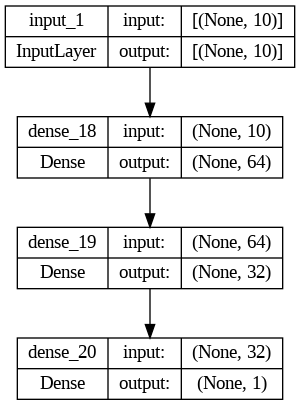

In [15]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

In [16]:
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

loss, mae = model.evaluate(X_test, y_test, verbose=1)
print(f'Mean Absolute Error on test set: {mae}')

# Predict on test set
y_pred = model.predict(X_test).flatten()  # Flatten to get 1D array for metrics

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Epoch 1/100
9/9 [==============================] - 1s 24ms/step - loss: 31522.8047 - mae: 158.6283 - val_loss: 22408.2949 - val_mae: 133.8014
Epoch 2/100
9/9 [==============================] - 0s 8ms/step - loss: 31340.3652 - mae: 158.0932 - val_loss: 22271.6445 - val_mae: 133.3133
Epoch 3/100
9/9 [==============================] - 0s 7ms/step - loss: 31148.7207 - mae: 157.5223 - val_loss: 22117.9141 - val_mae: 132.7602
Epoch 4/100
9/9 [==============================] - 0s 8ms/step - loss: 30925.6094 - mae: 156.8506 - val_loss: 21930.8711 - val_mae: 132.0941
Epoch 5/100
9/9 [==============================] - 0s 9ms/step - loss: 30660.3340 - mae: 156.0478 - val_loss: 21701.3496 - val_mae: 131.2764
Epoch 6/100
9/9 [==============================] - 0s 12ms/step - loss: 30322.4180 - mae: 155.0390 - val_loss: 21423.0508 - val_mae: 130.2791
Epoch 7/100
9/9 [==============================] - 0s 11ms/step - loss: 29907.2402 - mae: 153.7921 - val_loss: 21081.8965 - val_mae: 129.0534
Epoch 8/10